<a href="https://colab.research.google.com/github/danunter/hw/blob/main/hw6_drone_bird_other_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

preprocessing
take image from folder x, crop it acording to the bounding box listed in the .txt file, resize it and save it in new folder with the label x.
also preform a random crop, resize it and save it in folder "other"
x=(drone, bird)
i took that from hw4 and modify it myself

In [4]:
import os
from PIL import Image

input_folders = ["/content/drive/MyDrive/AI_course/hw6/drone_data", "/content/drive/MyDrive/AI_course/hw6/bird_data"]
output_folders = ["/content/drive/MyDrive/AI_course/hw6/dataset/drone", "/content/drive/MyDrive/AI_course/hw6/dataset/bird"]

for i in range(2):
  # Set the paths
  input_folder = input_folders[i]
  output_folder = output_folders[i]

  # Create the output folder if it doesn't exist
  os.makedirs(output_folder, exist_ok=True)

  # Get a list of all files in the input folder
  files = os.listdir(input_folder)

  # Iterate through each file in the input folder
  for file in files:
      # Check if the file is an image (assuming it's a jpg, you can modify accordingly)
      if file.endswith(".jpg"):
          # Construct the paths for the image and its corresponding txt file
          image_path = os.path.join(input_folder, file)
          txt_path = os.path.join(input_folder, file.replace(".jpg", ".txt"))

          # Check if the corresponding txt file exists
          if os.path.exists(txt_path):
              # Open the txt file and get the bounding box coordinates
              with open(txt_path, 'r') as txt_file:
                  lines = txt_file.readlines()
                  # Assuming the YOLOv8 format has four values: class, x_center, y_center, width, height
                  # You may need to adjust this based on the actual format of your txt files
                  x_center, y_center, width, height = map(float, lines[0].split()[1:])

              # Open the image
              image = Image.open(image_path)

              # Calculate the coordinates for cropping
              left = int((x_center - width / 2) * image.width)
              top = int((y_center - height / 2) * image.height)
              right = int((x_center + width / 2) * image.width)
              bottom = int((y_center + height / 2) * image.height)

              # Crop the image
              cropped_image = image.crop((left, top, right, bottom))

              # Resize the cropped image to 32x32
              resized_image = cropped_image.resize((32, 32))

              # Save the cropped image to the output folder
              output_path = os.path.join(output_folder, file)
              resized_image.save(output_path)

              # print(f"Processed: {file}")
          else:
              print(f"Corresponding txt file not found for: {file}")

  import random

  # Set the paths
  output_folder = "/content/drive/MyDrive/AI_course/hw6/dataset/other"

  # Create the output folder if it doesn't exist
  os.makedirs(output_folder, exist_ok=True)

  # Get a list of all files in the input folder
  files = os.listdir(input_folder)

  # Iterate through each file in the input folder
  for file in files:
      # Check if the file is an image (assuming it's a jpg, you can modify accordingly)
      if file.endswith(".jpg"):
          # Construct the paths for the image and its corresponding txt file
          image_path = os.path.join(input_folder, file)
          txt_path = os.path.join(input_folder, file.replace(".jpg", ".txt"))

          # Check if the corresponding txt file exists
          if os.path.exists(txt_path):
              # Open the txt file and get the bounding box coordinates
              with open(txt_path, 'r') as txt_file:
                  lines = txt_file.readlines()
                  # Assuming the YOLOv8 format has four values: class, x_center, y_center, width, height
                  # You may need to adjust this based on the actual format of your txt files
                  x_center, y_center, width, height = map(float, lines[0].split()[1:])

              # Open the image
              image = Image.open(image_path)

              # Calculate the maximum allowed random cropping position
              max_left = int((1 - width) * image.width)
              max_top = int((1 - height) * image.height)

              # Randomly choose the cropping position
              left = random.randint(0, max_left)
              top = random.randint(0, max_top)
              right = left + int(width * image.width)
              bottom = top + int(height * image.height)

              # Crop the image
              cropped_image = image.crop((left, top, right, bottom))

              # Resize the cropped image to 32x32
              resized_image = cropped_image.resize((32, 32))

              # Save the cropped image to the output folder
              output_path = os.path.join(output_folder, file)
              resized_image.save(output_path)

              # print(f"Processed: {file}")
          else:
              print(f"Corresponding txt file not found for: {file}")


create dataset using: "tf.keras.preprocessing.image_dataset_from_directory"

In [11]:
import tensorflow as tf

# Define paths to your train and validation data
train_data_dir = '/content/drive/MyDrive/AI_course/hw6/dataset'

# Define image dimensions, batch size, and the number of classes
img_width, img_height = 32, 32
num_classes = 3  # Change this based on the number of classes in your dataset

# Create a training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    image_size=(img_width, img_height),
    shuffle=True,
    seed=42,  # Optional, set a seed for reproducibility
    validation_split=0.2,  # Optional, specify the validation split
    subset="training",  # Specify "training" for the training set
)

# Create a validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    image_size=(img_width, img_height),
    shuffle=True,
    seed=42,  # Optional, set a seed for reproducibility
    validation_split=0.2,  # Optional, specify the validation split
    subset="validation",  # Specify "validation" for the validation set
)

# Concatenate the training and validation datasets
dataset = train_dataset.concatenate(validation_dataset)

Found 15742 files belonging to 3 classes.
Using 12594 files for training.
Found 15742 files belonging to 3 classes.
Using 3148 files for validation.


augmentation

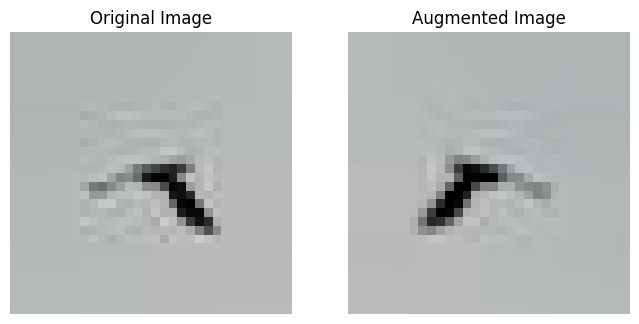

In [19]:
import tensorflow as tf

data_augmentation_layer = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal', input_shape=(32, 32, 3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
], name='data_augmentation')



import matplotlib.pyplot as plt
import numpy as np

# Get a random image from the dataset
for images, _ in dataset.take(1):  # Assuming 'dataset' is your concatenated dataset
    random_image = images[np.random.choice(images.shape[0])]

# Expand the dimensions to match the input shape of the data augmentation layer
random_image = np.expand_dims(random_image, axis=0)

# Apply data augmentation to the random image
augmented_image = data_augmentation_layer(random_image, training=True)

# Display the original and augmented images side by side
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(random_image[0].astype(np.uint8))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_image[0].numpy().astype(np.uint8))
plt.axis('off')

plt.show()

CNN model for classification
fit function
train the model with dataset


Epoch 1/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.7337 - loss: 2.4993
Epoch 2/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.8940 - loss: 0.3068
Epoch 3/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9127 - loss: 0.2554
Epoch 4/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9250 - loss: 0.2199
Epoch 5/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9323 - loss: 0.1939
Epoch 6/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9352 - loss: 0.1900
Epoch 7/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9408 - loss: 0.1770
Epoch 8/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9437 - loss: 0.1587
Epoch 9/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9468 - loss: 0.1586
Epoch 10/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9440 - loss: 0.1594
Epoch 11/15
493/493 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9469 - loss: 0.1597
Epoch 12/15
493/493 ━━━━━━━━━━

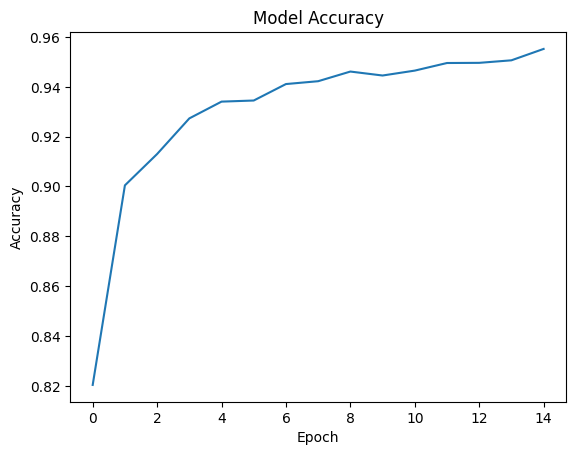

493/493 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step


NameError: ignored

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image


# Define image dimensions, batch size, and the number of classes
img_width, img_height = 32, 32
num_classes = 3  # Change this based on the number of classes in your dataset

# Define the CNN model
model = models.Sequential([data_augmentation_layer,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define batch size and number of epochs
batch_size = 120
epochs = 15

# Fit the model
history = model.fit(dataset, epochs=epochs, batch_size=batch_size)

# Plot the accuracy graph
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Generate predictions for the dataset
y_pred = model.predict(dataset)
y_true = np.concatenate([y for _, y in dataset])

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1), labels=range(num_classes))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=range(num_classes))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

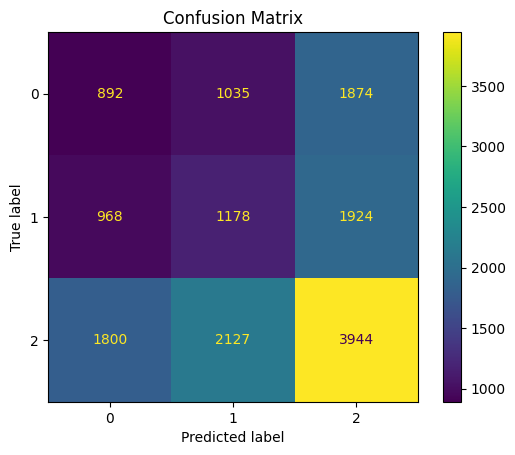

In [23]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1), labels=range(num_classes))

# Plot confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=range(num_classes))
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


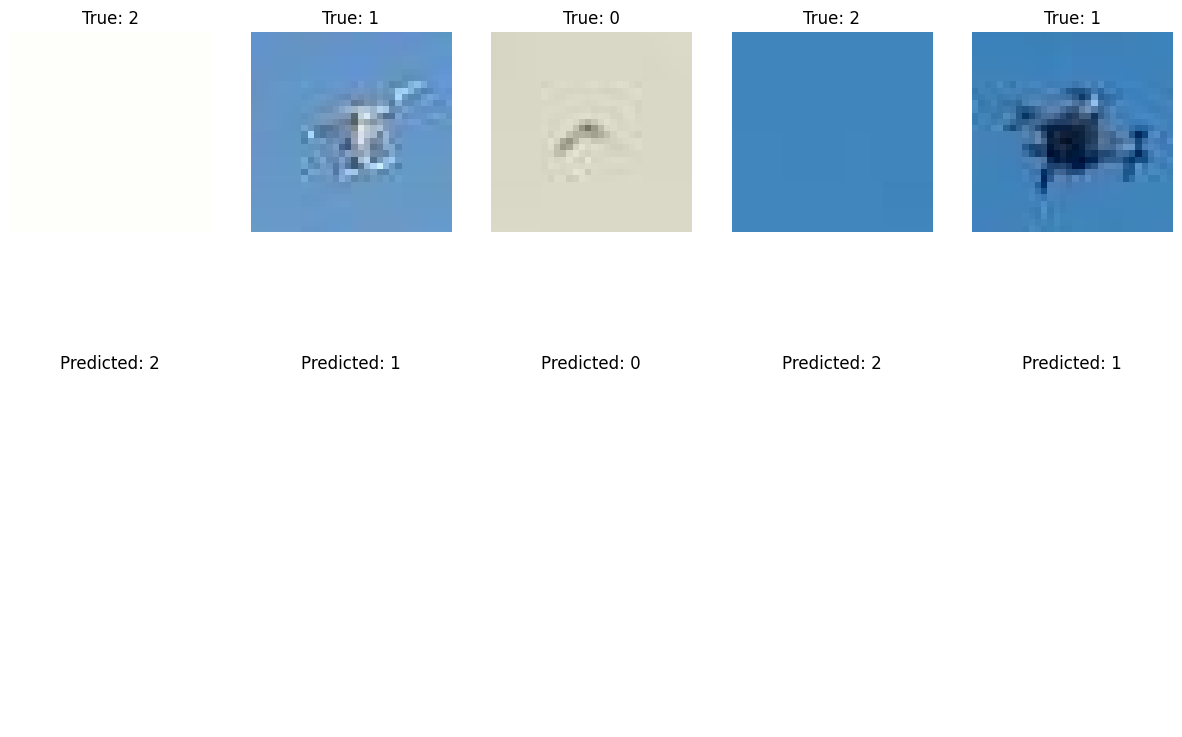

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Choose 5 random images from the dataset
sample_images, sample_labels = [], []
for images, labels in dataset.take(5):
    sample_images.append(images.numpy())
    sample_labels.append(labels.numpy())

sample_images = np.concatenate(sample_images)
sample_labels = np.concatenate(sample_labels)

# Perform forward pass and get predictions
predictions = model.predict(sample_images)

# Display the images along with predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].astype(np.uint8))
    plt.title(f"True: {sample_labels[i]}")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.show()
